
# Digital Signal Processing

## Solutions Exercise 3

### Part 1: Discrete Signals and Systems (Chapt. 2)

#### Task 1: analysis of a 2nd order system
**a)** The schematic corresponds to the following equation

\begin{equation*}
y(k) = y(k-1) - 0.5 \cdot y(k-2) + x(k) + 1.5 \cdot x(k-1) + x(k-2) \;.
\end{equation*}

Transformation to the z-domain yields the difference equation

\begin{equation*}
Y(z) = Y(z)z^{-1} - 0.5 \cdot Y(z)z^{-2} + X(z) + 1.5 \cdot X(z)z^{-1} + X(z)z^{-2} \;.
\end{equation*}

Transforming the transfer function results in the familiar expression:

\begin{equation*}
Y(z) (1 - z^{-1} + 0.5 \cdot z^{-2}) = X(z) (1 + 1.5 \cdot z^{-1} + z^{-2})
\end{equation*}
\begin{equation*}
H(z) = \frac{Y(z)}{X(z)} = \frac{1 + 1.5 \cdot z^{-1} + z^{-2}}{1 - z^{-1} + 0.5 \cdot z^{-2}} \;.
\end{equation*}

**b)** The impulse response can be optained by exciting the system with $ x(k) = \left\{
    \begin{array}{l l}	
         1, &  k = 0\\
         0,  & \text{else}
    \end{array}\right.\;.$
Its first 10 values are:

\begin{equation*}
h(k) = [1, 2.5, 3, 1.75, 0.25, -0.625, -0.75, -0.4375, -0.0625, 0.15625, \ldots]
\end{equation*}

**c & d)** 2nd order system in Python:

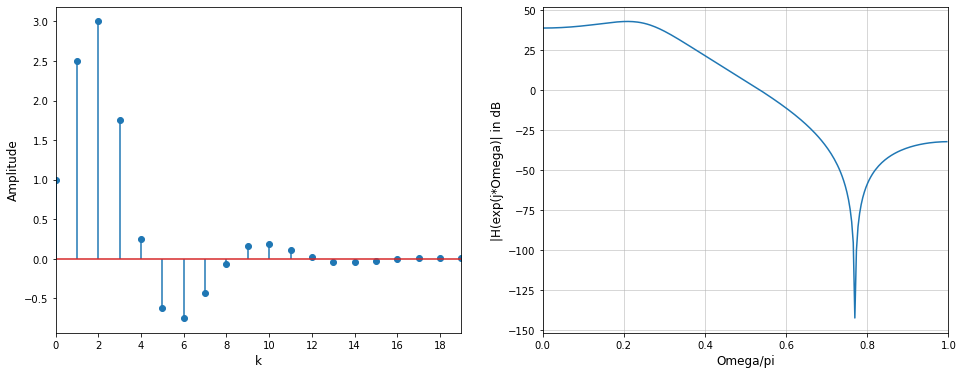

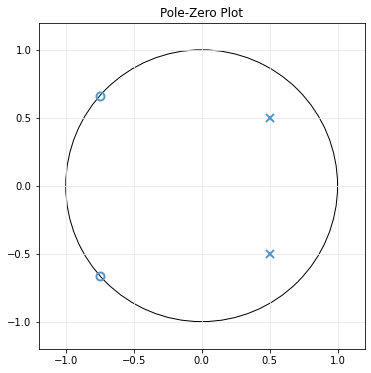

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
from functions.zplane import zplane 

##### Part c: Impulseresponse #####

def filtersystem(x):
    '''
    Implementation of the 2nd Order system from exercise 3,
    1. Discrete Signals and Systems (Chapt. 2).
    '''                
    x = np.append(np.zeros(2), x)        # we place two zeros in front of the input-vector,
                                         # which represent the past-values of x(-2)=0 and x(-1)=0
                                         # ATTENTION! The vector index '0' is now equivalent to time-index k=-2
    # System memory over time k
    y = np.zeros(len(x))       # index 0 and 1 represent past values y(-2)=0 and y(-1)=0
    # via the difference-equation we calculate y(k)
    # we start at index '2' and since it is equivalent to the time-index k=0
    # we go up to the index which is equal to the length of input-vector x
    for k in range(2,len(x)):
        y[k] = y[k-1] - 0.5*y[k-2] + x[k] + 1.5*x[k-1] + x[k-2]

    # The first two values of y are the past values y(-2) and y(-1)
    # we remove them from the vector y
    y = y[2:]
    return y


# Input signal with first entry 1 and 20 zeros follow
x = np.zeros(21)    # 21 zeros
x[0] = 1            # set first value to 1
# -> equivalent to dirac-impulse at k=0
y = filtersystem(x)

# Graphical output
k = np.arange(20)
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
axs[0].stem(k,y[:20], use_line_collection=True)
axs[0].set_xlim((0,19))
axs[0].xaxis.set_ticks(np.arange(0, 19, 2))
axs[0].set_xlabel('k', fontsize='large')
axs[0].set_ylabel('Amplitude', fontsize='large')

##### Part d: Frequencyresponse and Z-Plane #####
b = np.array(([1, 1.5, 1]))                     # initialising vector b with coefficients of the numerator
a = np.array(([1, -1, 0.5]))                    # initialising vector a with coefficients of the denominator

w,H =scipy.signal.freqz(b,a,256)    # computes the complex frequency response H
                                    # w are the discrete indices of the normalized frequency Omega
                                    # within the range 0 to pi
                                    # here we use 256 of these indices
                                    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html

# Graphical output
H_dB = 20 * np.log(np.abs(H))       # calculate magnitude of H in dB
index = w/np.pi                     # normalize the values to range from 0 to 1

axs[1].plot(index,H_dB)             # plotting H in dB
axs[1].grid(linewidth=0.5)
axs[1].set_xlim((0,1))
axs[1].set_xlabel('Omega/pi', fontsize='large')
axs[1].set_ylabel('|H(exp(j*Omega)| in dB', fontsize='large')
plt.show()


zplane(b,a)  # by passing the coefficients-vectors a and b to the 
             # function 'zplane' we receive a zero-pole-plot
             # the required code can be found in functions/zplane.py

#### Task 2: impulse response, step response, frequency response
**a & b)** Following is the plot of the impulse response and the step response of a system, which is characterized through the difference equation 2 within the interval $-10 \leq k \leq 100$:

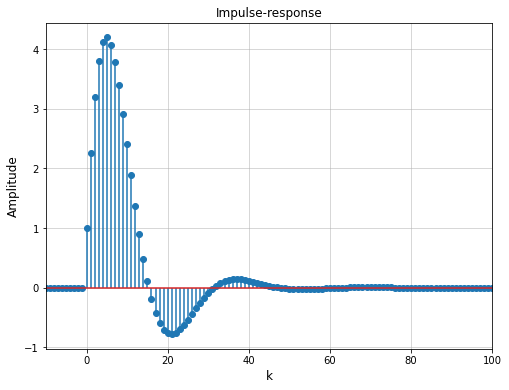

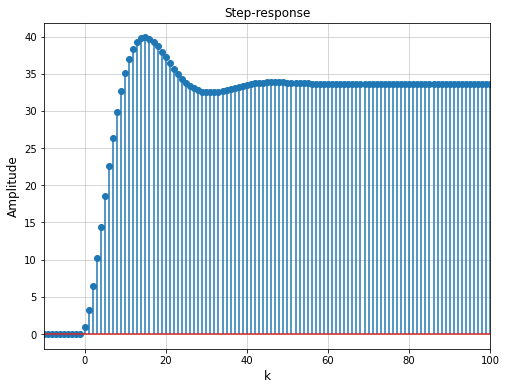

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal

##### Part a: calculation of the impulse response #####
k = np.arange(-10,101,1)    # discrete time vector from -10 to 100
x = np.zeros(111)           # sequence of 111 zeros.
x[10] = 1                   # The 11th sample is replaced by a one,
                            # Considering the 10 negative values (-10<k<100) we get an impulse at
                            # k=0: [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 ...]
b = np.array(([1, 0.5]))   # Filter coefficients b for the forward branch
a = np.array(([1, -1.8*np.cos(np.pi/16), 0.81]))   # Filter coefficients a for the backward branch
y = scipy.signal.lfilter(b,a,x)

# Graphical output
fig, axs = plt.subplots(figsize=(8, 6))
axs.stem(k,y, use_line_collection=True)
axs.axis([-10, 100, None, None])
axs.grid(linewidth=0.5)
axs.set_xlabel('k', fontsize='large')
axs.set_ylabel('Amplitude', fontsize='large')
axs.set_title('Impulse-response', fontsize='large')
plt.show()


##### Part b: calculation of the step-response #####
x = np.append(np.zeros(10), np.ones(101))   # vector with 10 zeros and vector with 101 ones are merged 
                                            # to vector of length 111 to get the step-function.
                                            # [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 ...]
        
b = np.array(([1, 0.5]))   # Filter coefficients b for the forward branch
a = np.array(([1, -1.8*np.cos(np.pi/16), 0.81]))   # Filter coefficients a for the backward branch
y = scipy.signal.lfilter(b,a,x)

# Graphical output
fig, axs = plt.subplots(figsize=(8, 6))
axs.stem(k,y, use_line_collection=True)
axs.axis([-10, 100, None, None])
axs.grid(linewidth=0.5)
axs.set_xlabel('k', fontsize='large')
axs.set_ylabel('Amplitude', fontsize='large')
axs.set_title('Step-response', fontsize='large')
plt.show()

### Part 2: Recursive Filters (Chapt. 4)

#### Task 1: design of recursive filters
For the given tolerance scheme with $f_D = 1\, \textrm{kHz}$, $f_s = 1.4\, \textrm{kHz}$, $R_P = 0.5\, \textrm{dB}$, $R_S = 30\, \textrm{dB}$ and $f_A = 8\, \textrm{kHz}$, the following amplitude response and pole-zero-plot is optained.

**Butterworth low-pass:**  
The Butterworth-design needs a high filter order of $m=12$ to fulfill the tolerance scheme. The amplitude response (left figure) confirms the adherence to the scheme and reflects the typical flat trend in the pass band. for $\Omega=0$, it is maximally flat, because all $m-1$ derivations of the amplitude response are equal to zero. The evaluation of the pole-zero-plot clarifies the stability of the system: All the poles are found within the unit circle[1]. They still have the form of an ellipse, while all the zeros lie at $z=-1$[2].
Filters, whose zeros lie at $z=-1$ are called __all-pole__ filters. The amplitude response shows, that the tolerance scheme is not fully used, resp. the filter is over dimensioned. This statement is shown e.g. by a over fulfilled stop band attenuation.


**Chebyshev low-pass, type I:**  
The tolerance scheme could be exploited better for example by using a Chebyshev low-pass. In contrast to a Butterworth low-pass, the necessary order to fulfill this filter is smaller.
If, like in this case, an uniform approximation in pass band is desired, the Chebyshev low-pass type I is used. The amplitude response reflects the cosine formed trend of the Chebyshev-Polynomial in pass band (4.2.40) while the pole-zero-plot shows the position of the poles. The zeros lie, like in the Butterworth approximation at $z=-1$ resp. in __s__-domain in infinity (see footnotes for Butterworth low-pass).
The monotonously falling trend in the stop band is also shown here. Furthermore, it can be seen that the tolerance scheme at $\Omega_s = 0.35$ is more than satisfied. This effect results in the necessity to choose the $n$ as an integer filter order.


**Chebyshev low-pass, type II:**  
In contrast to Chebyshev low-pass type I, a uniform approximation in stop band is demanded. Therefore, the zeros do not lie at $z=-1$ anymore, they are distributed on the unit circle. The necessary filter order is analogue to type I, $m=6$.

**Cauer low-pass:**  
The Cauer low-pass combines both Chebyshev designs, so that a uniform approximation in stop and pass band is archived. The filter order can be reduced to the minimal value of $m=4$ and the pole-zero plot shows the position of the given poles and zeros for the uniform approximation.

If we conclude the substantial difference of the filter types, we can make the statement, that the Butterworth low-pass has the highest filter order and the flattest trend of the amplitude response. A better usage of the tolerance scheme, e.g. through the uniform approximation, which was done here using Chebyshev and Cauer filter, leads to lower filter oders. The disadvantage lies in the strong phase distortion and therefore a strongly fluctuating group delay is observed.

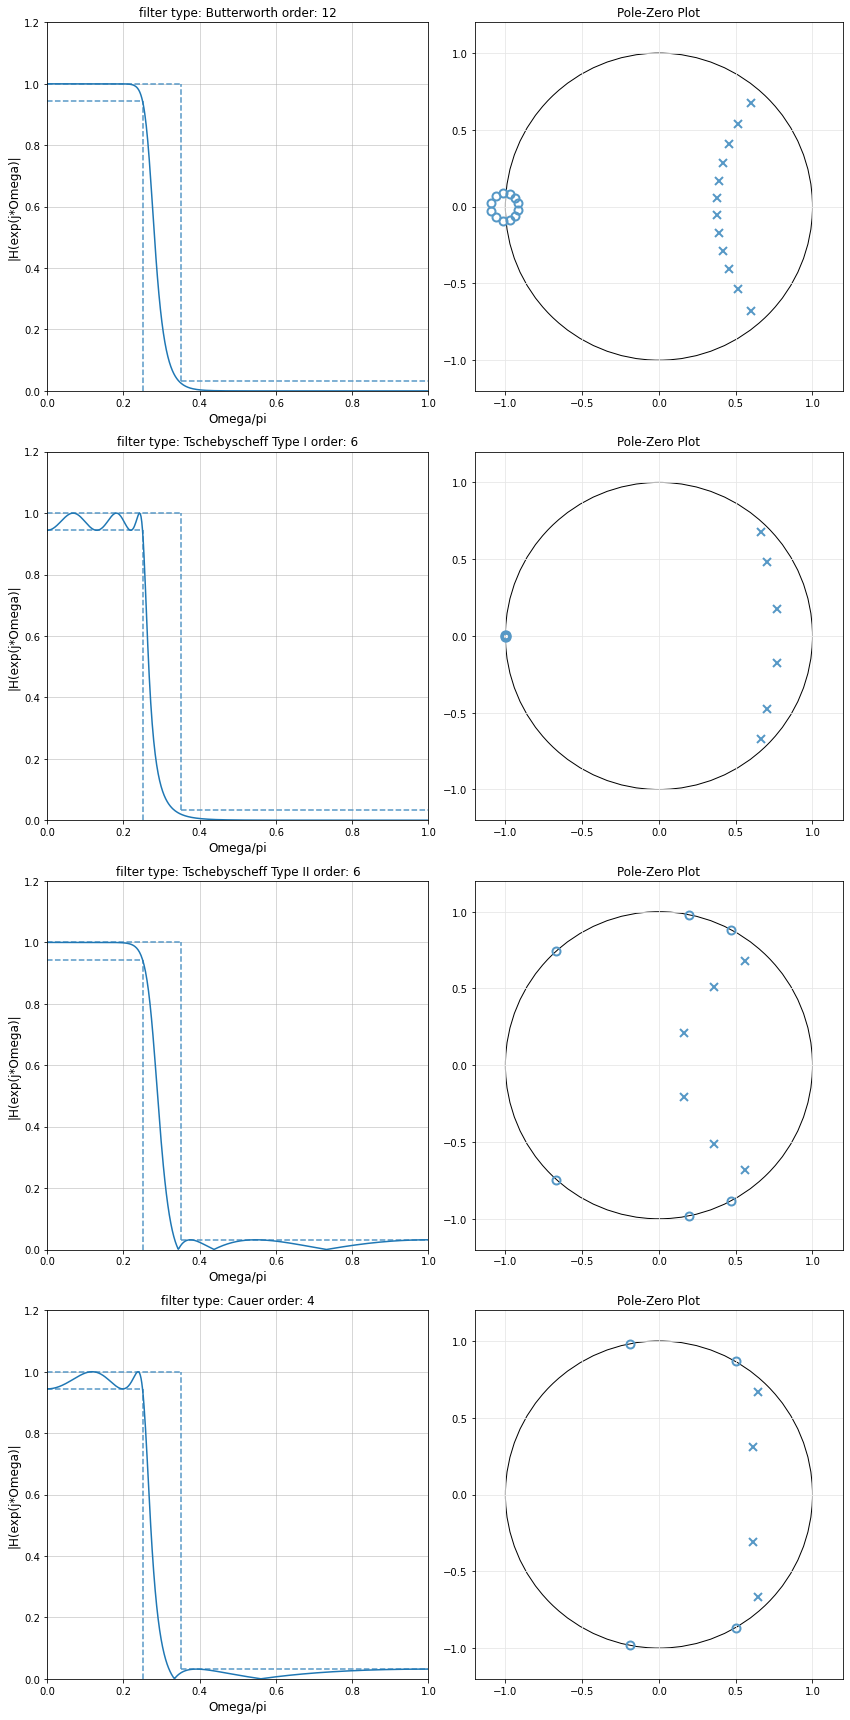

In [3]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
from functions.zplane import zplane_ax 

fD = 1000
fS = 1400
Rp = 0.5
Rs = 30
fA = 8000
# calculate the normalized frequencies:
Wp = 2*fD/fA
Ws = 2*fS/fA


# Graphical output
fig, axs = plt.subplots(4, 2, figsize=(12, 24))


for typ in range(4):
    if typ == 0:
        [n,Wn] = scipy.signal.buttord(Wp,Ws,Rp,Rs)
        [b,a] = scipy.signal.butter(n, Wn)
        FType = 'Butterworth'
    elif typ == 1:
        [n,Wn] = scipy.signal.cheb1ord(Wp,Ws,Rp,Rs)
        [b,a] = scipy.signal.cheby1(n, Rp, Wn)
        FType = 'Tschebyscheff Type I'
    elif typ == 2:
        [n,Wn] = scipy.signal.cheb2ord(Wp,Ws,Rp,Rs)
        [b,a] = scipy.signal.cheby2(n, Rs, Wn)
        FType = 'Tschebyscheff Type II'
    elif typ == 3:
        [n,Wn] = scipy.signal.ellipord(Wp,Ws,Rp,Rs)
        [b,a] = scipy.signal.ellip(n, Rp, Rs, Wn)
        FType = 'Cauer'
    else:
        print('something is wrong...')

    [W,H] = scipy.signal.freqz(b,a,512)
    H = np.abs(H)
    axs[typ,0].plot(W/np.pi, H)
    TitleString = 'filter type: ' + FType + ' order: ' + str(n)
    axs[typ,0].set_title(TitleString)
    axs[typ,0].set_xlabel('Omega/pi', fontsize='large')
    axs[typ,0].set_ylabel('|H(exp(j*Omega)|', fontsize='large')
    axs[typ,0].axis([0,1,0,1.2])
    axs[typ,0].grid(linewidth=0.5)
    axs[typ,0].vlines(x=Ws, ymin=10**(-Rs/20), ymax=1, colors='#5698c6', linestyles='dashed')
    axs[typ,0].vlines(x=Wp, ymin=0, ymax=10**(-Rp/20), colors='#5698c6', linestyles='dashed')
    axs[typ,0].hlines(y=10**(-Rs/20), xmin=Ws, xmax=1, colors='#5698c6', linestyles='dashed')
    axs[typ,0].hlines(y=10**(-Rp/20), xmin=0, xmax=Wp, colors='#5698c6', linestyles='dashed')
    axs[typ,0].hlines(y=1, xmin=0, xmax=Ws, colors='#5698c6', linestyles='dashed')
    
    zplane_ax(b,a,axs[typ,1])



plt.tight_layout()